# Intro to Polars with NYC taxi data

In [2]:
import polars as pl

## Parquet vs Arrow

Reading in a parquet file will always be slower than directly reading from an arrow file.

In [3]:
df = pl.read_parquet("data/fhvhv_data.parquet")

In [4]:
df.write_ipc("data/fhvhv_data.arrow")

In [5]:
df = pl.read_ipc("data/fhvhv_data.arrow")


## Polars expressions and data manipulation

### Select

In [6]:
df2 = df.select('hvfhs_license_num', 'dispatching_base_num', 'tolls', 'sales_tax','tips', 'trip_miles', 'trip_time')
df2.head()

hvfhs_license_num,dispatching_base_num,tolls,sales_tax,tips,trip_miles,trip_time
str,str,f64,f64,f64,f64,i64
"""HV0003""","""B03404""",0.0,2.21,0.0,1.18,664
"""HV0003""","""B03404""",0.0,1.06,0.0,0.82,460
"""HV0003""","""B03404""",0.0,2.65,0.0,1.18,595
"""HV0003""","""B03404""",0.0,0.7,0.0,1.65,303
"""HV0003""","""B03404""",0.0,0.84,0.0,1.65,461


### Filter

In [8]:
df2.filter(pl.col('tips') > 5).head()

hvfhs_license_num,dispatching_base_num,tolls,sales_tax,tips,trip_miles,trip_time
str,str,f64,f64,f64,f64,i64
"""HV0003""","""B03404""",0.0,3.45,10.0,3.93,1389
"""HV0003""","""B03404""",0.0,2.03,5.11,10.05,1362
"""HV0003""","""B03404""",0.0,3.14,7.92,7.92,1506
"""HV0003""","""B03404""",0.0,1.78,5.03,1.86,515
"""HV0003""","""B03404""",0.0,2.73,5.1,5.07,2088


### Make new dataframe  with_columns and alias

In [9]:
df2.with_columns(pl.col("trip_miles").round(1).alias("rounded_miles")).head()

hvfhs_license_num,dispatching_base_num,tolls,sales_tax,tips,trip_miles,trip_time,rounded_miles
str,str,f64,f64,f64,f64,i64,f64
"""HV0003""","""B03404""",0.0,2.21,0.0,1.18,664,1.2
"""HV0003""","""B03404""",0.0,1.06,0.0,0.82,460,0.8
"""HV0003""","""B03404""",0.0,2.65,0.0,1.18,595,1.2
"""HV0003""","""B03404""",0.0,0.7,0.0,1.65,303,1.7
"""HV0003""","""B03404""",0.0,0.84,0.0,1.65,461,1.7


### Aggregate

In [10]:
df.select('hvfhs_license_num', 'dispatching_base_num', 'tolls', 'sales_tax','tips', 'trip_miles', 'trip_time').with_columns(
            [
                pl.col("trip_miles")
                .round(0)
                .alias("rounded_miles"),
                pl.col("trip_time")
                .apply(lambda x: round(x / 1000, 0) * 1000)
                .alias("rounded_time"),
            ]
        ).groupby(["rounded_miles", "rounded_time"]).count()

rounded_miles,rounded_time,count
f64,f64,u32
15.0,7000.0,190
25.0,7000.0,227
57.0,16000.0,2
114.0,8000.0,35
65.0,6000.0,209
65.0,5000.0,397
65.0,4000.0,131
53.0,9000.0,13
67.0,5000.0,317


## Lazy vs eager
Polars lazy API allows you to build queries on data but waits on exection untill you say it's time. Here's an example of how the two differ:

#### Eager API with dataframe

In [45]:
df.select(
    "hvfhs_license_num",
    "dispatching_base_num",
    "tolls",
    "sales_tax",
    "tips",
    "trip_miles",
    "trip_time",
).with_columns(
    [
        pl.col("trip_miles").round(0).alias("rounded_miles"),
        pl.col("trip_time")
        .apply(lambda x: round(x / 100, 0) * 100)
        .alias("rounded_time"),
        pl.col("dispatching_base_num").cast(pl.Categorical),
    ]
).sort(
    pl.col("sales_tax")
).sort(
    pl.col("rounded_miles")
).filter(
    pl.col("rounded_miles") > 100
).filter(
    pl.col("rounded_time") > 10
).filter(pl.col("dispatching_base_num") == "B03404")

hvfhs_license_num,dispatching_base_num,tolls,sales_tax,tips,trip_miles,trip_time,rounded_miles,rounded_time
str,cat,f64,f64,f64,f64,i64,f64,f64
"""HV0003""","""B03404""",8.3,0.0,0.0,101.15,7455,101.0,7500.0
"""HV0003""","""B03404""",8.3,0.0,82.06,100.66,10239,101.0,10200.0
"""HV0003""","""B03404""",8.3,0.0,0.0,101.1,7041,101.0,7000.0
"""HV0003""","""B03404""",40.85,0.0,15.0,100.74,7489,101.0,7500.0
"""HV0003""","""B03404""",8.3,0.0,0.0,101.05,7887,101.0,7900.0
"""HV0003""","""B03404""",8.3,0.0,0.0,101.2,6973,101.0,7000.0
"""HV0003""","""B03404""",27.55,0.0,0.0,101.06,7902,101.0,7900.0
"""HV0003""","""B03404""",38.1,0.0,0.0,101.23,8153,101.0,8200.0
"""HV0003""","""B03404""",26.65,0.0,60.2,100.71,9667,101.0,9700.0


#### Lazy API with lazyframe

##### Build first

In [48]:
ldf = pl.scan_ipc("data/fhvhv_data.arrow")
query = ldf.select(
    "hvfhs_license_num",
    "dispatching_base_num",
    "tolls",
    "sales_tax",
    "tips",
    "trip_miles",
    "trip_time",
).with_columns(
    [
        pl.col("trip_miles").round(0).alias("rounded_miles"),
        pl.col("trip_time")
        .apply(lambda x: round(x / 100, 0) * 100)
        .alias("rounded_time"),
        pl.col("dispatching_base_num").cast(pl.Categorical),
    ]
).sort(
    pl.col("sales_tax")
).sort(
    pl.col("rounded_miles")
).filter(
    pl.col("rounded_miles") > 100
).filter(
    pl.col("rounded_time") > 10
).filter(pl.col("dispatching_base_num") == "B03404")

##### Then use collect for computation to fire

In [49]:
query.collect()

hvfhs_license_num,dispatching_base_num,tolls,sales_tax,tips,trip_miles,trip_time,rounded_miles,rounded_time
str,cat,f64,f64,f64,f64,i64,f64,f64
"""HV0003""","""B03404""",8.3,0.0,0.0,101.15,7455,101.0,7500.0
"""HV0003""","""B03404""",8.3,0.0,82.06,100.66,10239,101.0,10200.0
"""HV0003""","""B03404""",8.3,0.0,0.0,101.1,7041,101.0,7000.0
"""HV0003""","""B03404""",40.85,0.0,15.0,100.74,7489,101.0,7500.0
"""HV0003""","""B03404""",8.3,0.0,0.0,101.05,7887,101.0,7900.0
"""HV0003""","""B03404""",8.3,0.0,0.0,101.2,6973,101.0,7000.0
"""HV0003""","""B03404""",27.55,0.0,0.0,101.06,7902,101.0,7900.0
"""HV0003""","""B03404""",38.1,0.0,0.0,101.23,8153,101.0,8200.0
"""HV0003""","""B03404""",26.65,0.0,60.2,100.71,9667,101.0,9700.0


##### Visualize the lazy API execution plan

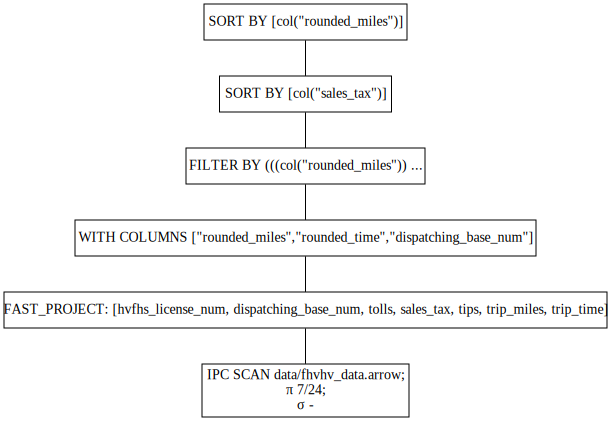

In [50]:
query.show_graph()